In [2]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
data = np.load('/fastio2/dasha/double_pulse/data_NuMuCC.npy', mmap_mode='r')

In [6]:
sz =len(data)
print(sz)

1670603


In [7]:
df = pd.read_pickle("/home/dup193/work/double_pulse/data/make_plot/MakePlot_INFO_FULL_withPred.pkl")

In [8]:
df.columns

Index(['index', 'tau_length', 'tau_position', 'qtotal', 'tau_energy',
       'strings', 'tau_direction', 'nu_energy', 'id', 'tau_time', 'Predict'],
      dtype='object')

In [9]:
df['Weights'] = np.ones(df.shape[0])/df.shape[0]

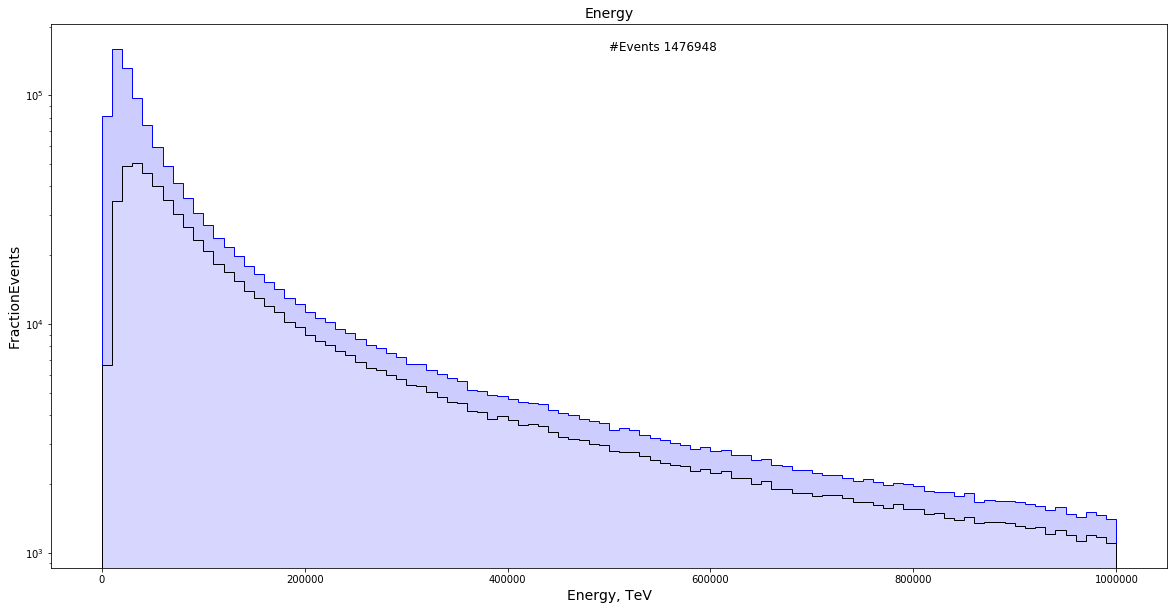

In [10]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Energy", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Energy, TeV', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data['neutrino']['energy'], bins =100,  histtype = 'step',edgecolor ='b', lw =1, fill=True, fc=(0, 0, 1, 0.2), range = [0,1000000], label = "Nu")  
ax.hist(df['nu_energy'], bins =100, histtype = 'step',edgecolor ='k', lw =1, fill=True, fc=(1, 1, 1, 0.2), range = [0,1000000], label = "Nu_old")  
#ax.hist(if_df_extra['nu_energy'], bins =100, histtype = 'step',edgecolor ='k', lw =1, fill=True, fc=(1, 1, 1, 0.2), range = [0,1000000], label = "Nu_old_extra_ids")  

#ax.hist(data['meson']['energy'], bins =100, histtype = 'step',edgecolor ='r', lw =1, fill=True, fc=(1, 0, 0, 0.2), range = [0,1000000], label = "Tau")  
plt.show()

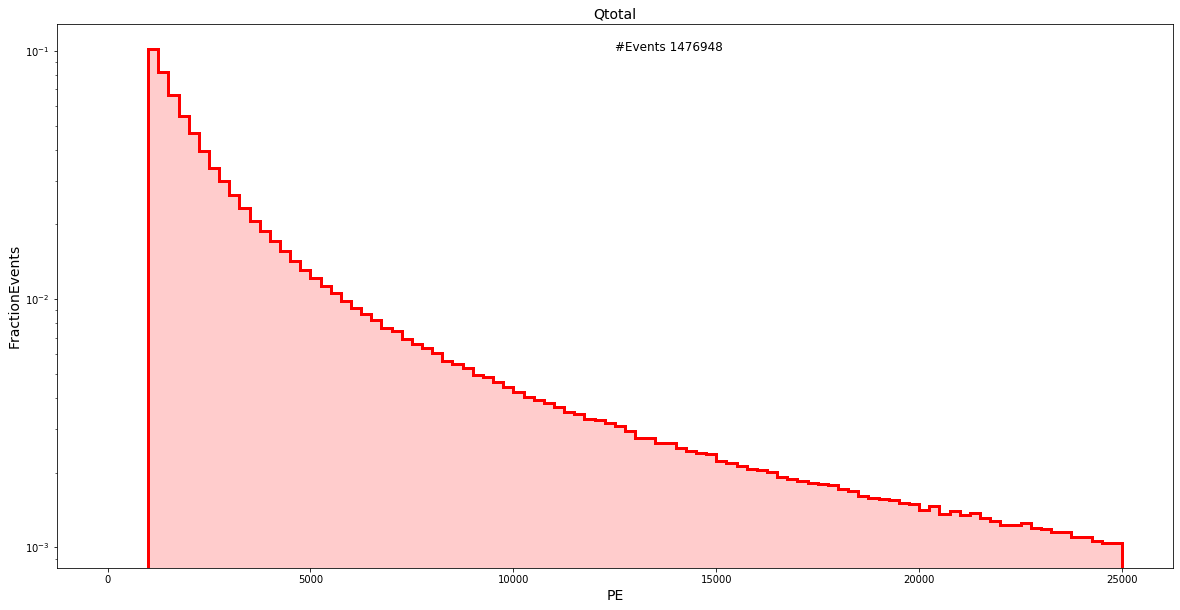

In [12]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
weights = np.ones(sz)/sz
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Qtotal", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('PE', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data['q_tot'], bins =100, weights= weights, histtype = 'step',edgecolor ='r', lw =3, fill=True, fc=(1, 0, 0, 0.2), range = [0,2.5*10**4], label = "Qtot")  
plt.show()

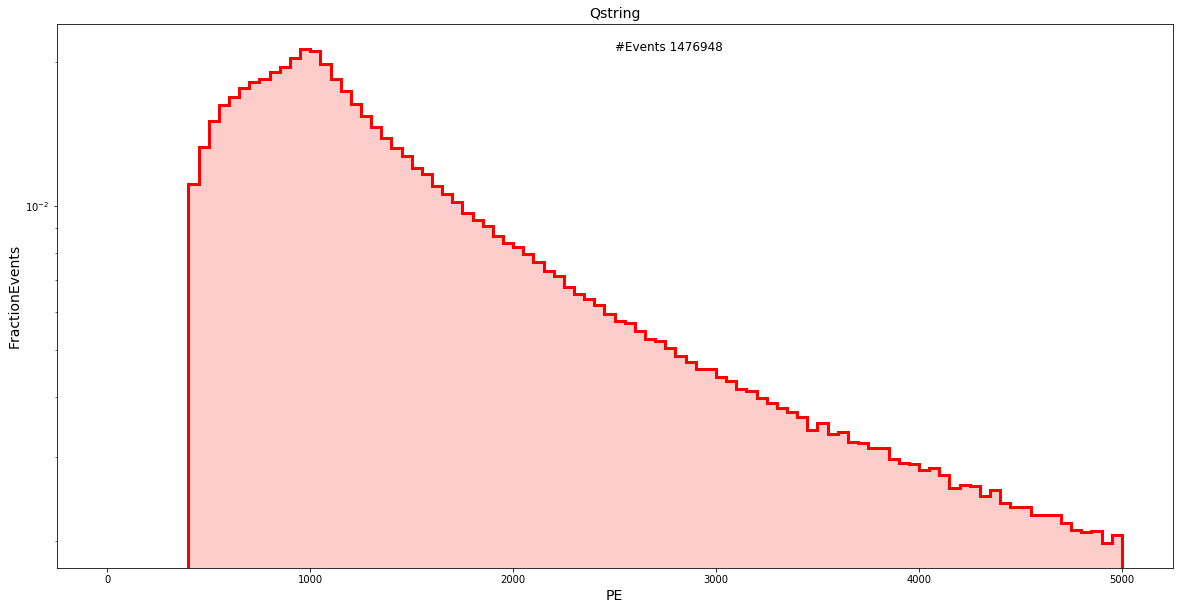

In [13]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
weights = np.ones(sz)/sz
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Qstring", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('PE', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)    
ax.hist(data['q_st'], bins =100, weights= weights, histtype = 'step',edgecolor ='r', lw =3, fill=True, fc=(1, 0, 0, 0.2), range = [0,0.5*10**4], label = "Qtot")  
plt.show()

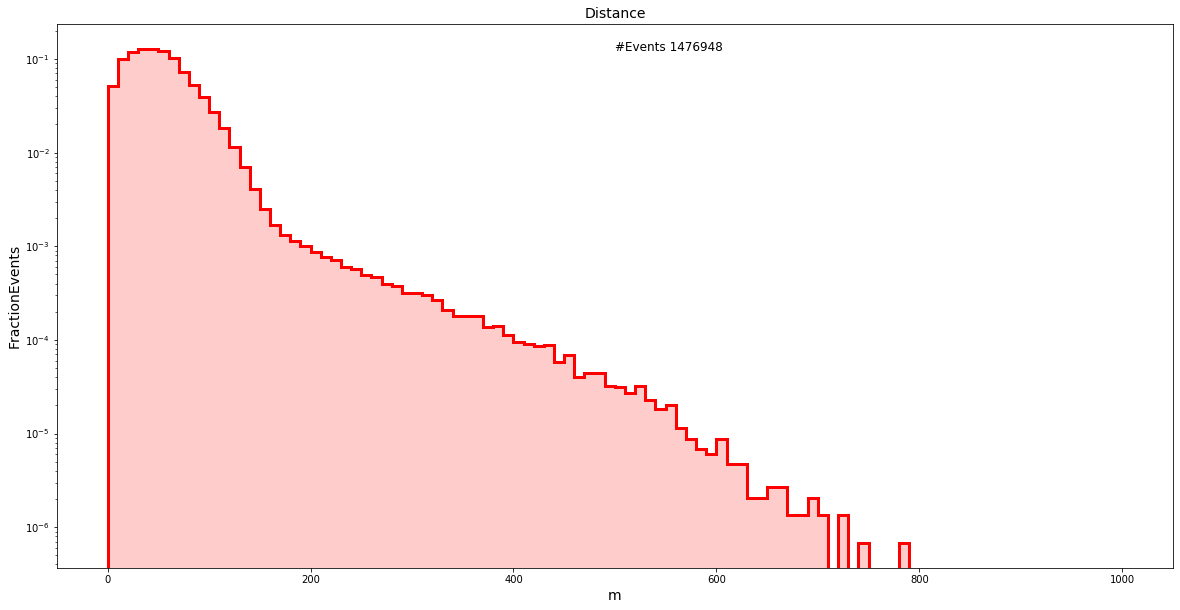

In [14]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
weights = np.ones(sz)/sz
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Distance", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('m', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data['distance'], bins =100, weights= weights, histtype = 'step',edgecolor ='r', lw =3, fill=True, fc=(1, 0, 0, 0.2), range = [0,10**3], label = "Qtot")  
plt.show()

In [8]:
from keras.models import load_model
model = load_model('/data/dfc13/DoublePulse/Models/Arch01/DP_model_6006.h5')
model.summary()

Using TensorFlow backend.
W1111 14:30:41.853915 139638490695424 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1111 14:30:41.879372 139638490695424 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1111 14:30:41.897349 139638490695424 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1111 14:30:41.933147 139638490695424 deprecation_wrapper.py:119] From /home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 251, 51, 32)       16032     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 25, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 101, 21, 64)       256064    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 8, 32)         92192     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 4, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [20]:
mean = np.mean(data['image'])
std = np.std(data['image'])

In [21]:
print(mean, std)

0.0008596053 0.011836949


In [ ]:
preds = []
for im in data['image']:
    im = im.reshape(1,300,60,1)
    im = (im-mean)/std
    pred = model.predict(im)
    preds.append(pred)
preds = np.array(preds)

In [ ]:
print(len(preds),preds[0])

In [ ]:
np.save('/fastio2/dasha/double_pulse/preds_2.npy', preds)

In [ ]:
preds = np.load('/fastio2/dasha/double_pulse/preds_NuMuCC.npy')

In [16]:
preds = preds.reshape(sz,2)
print(preds[0])

[0.08030367 0.91969633]


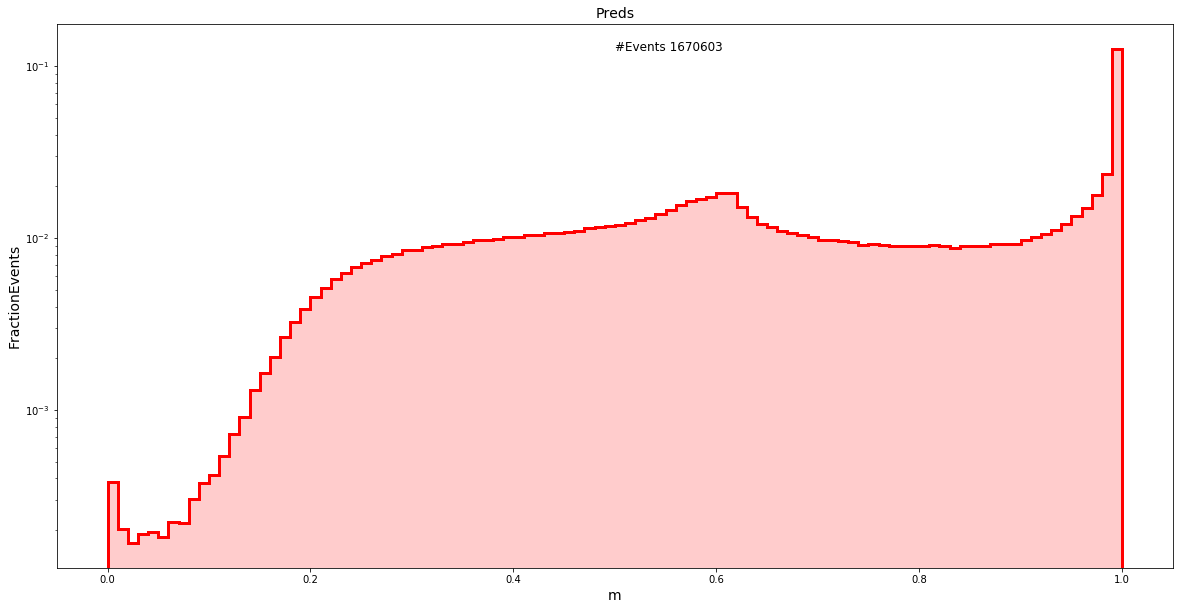

In [7]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
weights = np.ones(sz)/sz
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Preds", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('m', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(preds[:,1], bins =100, weights= weights, histtype = 'step',edgecolor ='r', lw =3, fill=True, fc=(1, 0, 0, 0.2), range = [0,1], label = "Qtot")  
plt.show()

In [8]:
mask_00_10 = preds[:,1] < 0.1
mask_10_50 = (0.1 <= preds[:,1]) & (preds[:,1] <0.5)
mask_50_90 = (0.5 <= preds[:,1]) & (preds[:,1] <0.9)
mask_90_100 = (0.9 <= preds[:,1]) & (preds[:,1] <1)
mask_100 = 1.0 == preds[:,1] 

In [9]:
print(len(data[mask_00_10])/sz*100, len(data[mask_10_50])/sz*100, len(data[mask_50_90])/sz*100, len(data[mask_90_100])/sz*100, len(data[mask_100])/sz*100)
print(len(data[mask_00_10]),len(data[mask_10_50]), len(data[mask_50_90]), len(data[mask_90_100]), len(data[mask_100]))

0.24446262816480036 28.830368435828262 45.94269254873839 22.07370632041245 2.9087700668560994
4084 481641 767520 368764 48594


In [20]:
weights = np.ones(sz)/sz
weights_00_10 = np.ones(len(data[mask_00_10]))/len(data[mask_00_10])
weights_10_50 = np.ones(len(data[mask_10_50]))/len(data[mask_10_50])
weights_50_90 = np.ones(len(data[mask_50_90]))/len(data[mask_50_90])
weights_90_100 = np.ones(len(data[mask_90_100]))/len(data[mask_90_100])
weights_100 = np.ones(len(data[mask_100]))/len(data[mask_100])

[(4294967280, 2606808.8, [1603.2068, 1239.3191, 1947.6779], [0.70722747, 0.43094066], 873.806, 2688.626)]
[(4294967280, 9650103., [2540.7244, 3358.6829, 1946.6088], [1.0396843, 0.8894681], -4645.3223, 4188.228)]
[(16, 7119584.5, [ 1583.478 , -3609.1252,  1946.7815], [1.118494 , 5.2369523], -3494.2678, 3850.9792)]
[(4294967280, 716810.75, [-520.4968 , -288.31924, 1947.9722 ], [0.2740154, 3.4478536], 16145.457, 2443.3938)]
[(4294967280, 6796384.5, [ 855.9429 ,  416.75647, 1947.929  ], [0.56722873, 0.51660085], 4113.459, 1458.6003)]
[(16, 175203.3, [-547.0901, 4820.974 , 1946.1534], [1.1069202, 1.7522662], -7218.6245, 5085.7124)]
[(4294967280, 4401705.5, [  505.6385, -1404.365 ,  1947.8252], [0.47205877, 4.8406706 ], 844.37415, 2671.0396)]
[(4294967280, 301406.44, [-2422.29   ,    98.58687,  1947.539  ], [0.8160918, 3.114543 ], -1684.9877, 3429.0066)]
[(4294967280, 636117.56, [ 1555.9236, -1380.9128,  1947.6605], [0.752888, 5.6636  ], 281.5102, 2832.328)]
[(16, 736147.25, [ 288.90192, 141

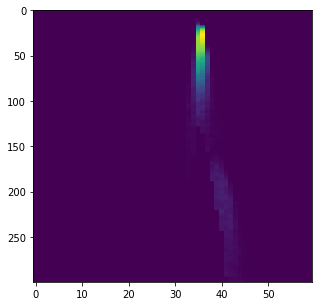

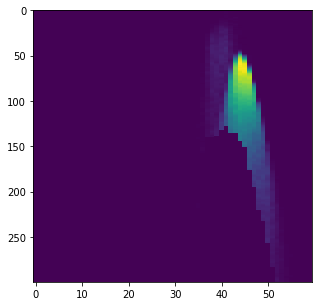

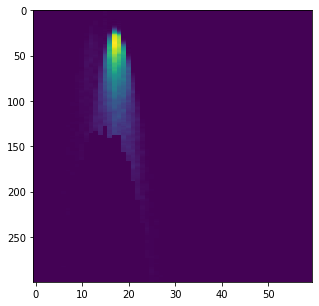

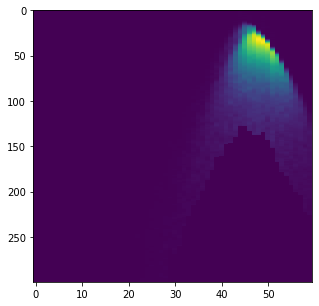

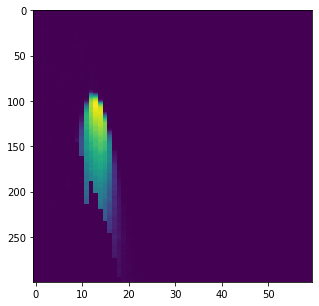

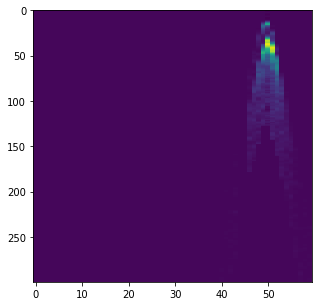

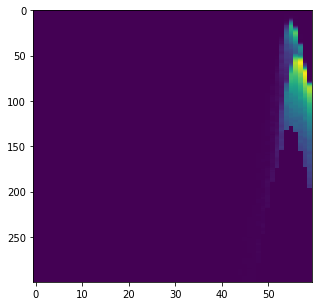

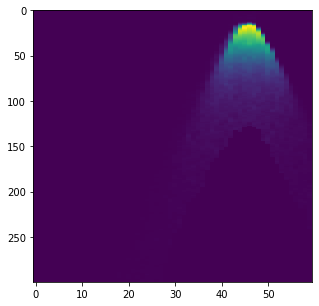

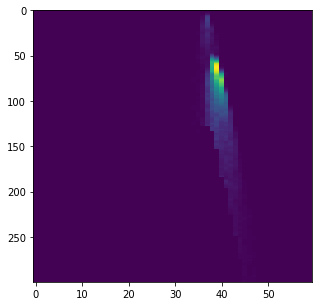

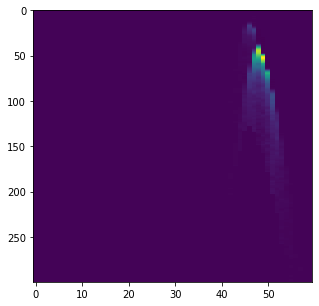

In [21]:
for i, im in enumerate(data['image'][mask_100][:10]):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.imshow(im.reshape(300,60), interpolation='nearest', aspect='auto', cmap= 'viridis')
    print(data['neutrino'][mask_100][i])

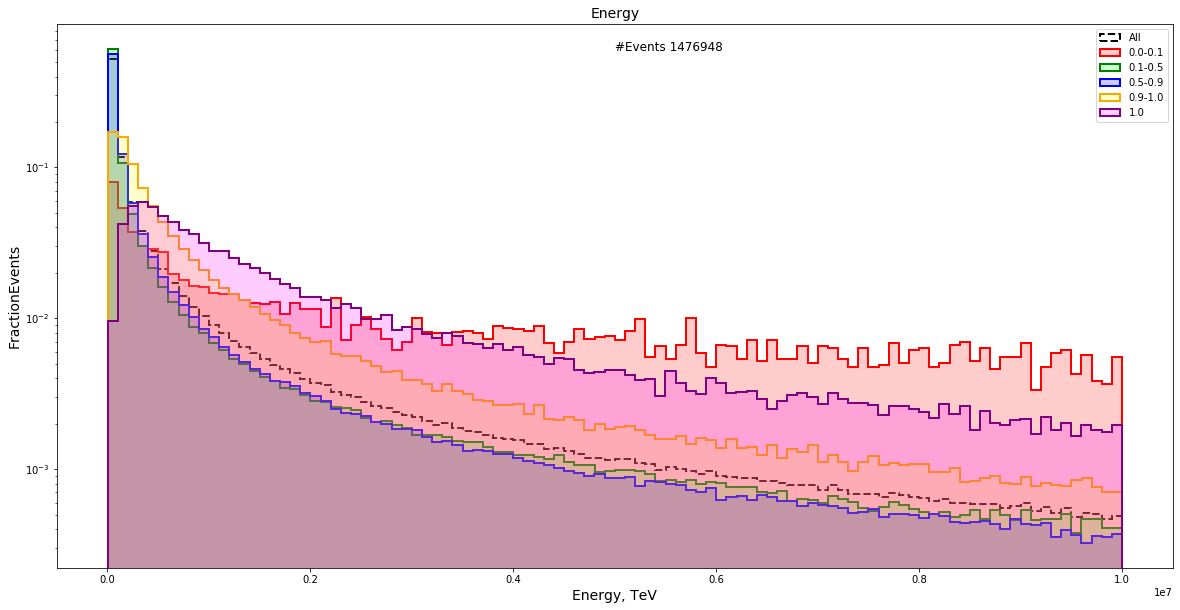

In [22]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Energy", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Energy, TeV', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data['neutrino']['energy'], bins =100, weights = weights, histtype = 'step',edgecolor ='k', lw =2, ls = "--", fill=True, fc=(1, 1, 1, 0.2), label = "All")  
ax.hist(data['neutrino']['energy'][mask_00_10], bins =100, weights = weights_00_10, histtype = 'step',edgecolor ='r', lw =2, fill=True, fc=(1, 0, 0, 0.2), label = "0.0-0.1")  
ax.hist(data['neutrino']['energy'][mask_10_50], bins =100, weights = weights_10_50, histtype = 'step',edgecolor ='g', lw =2, fill=True, fc=(0, 1, 0, 0.2), label = "0.1-0.5")  
ax.hist(data['neutrino']['energy'][mask_50_90], bins =100, weights = weights_50_90, histtype = 'step',edgecolor ='b', lw =2, fill=True, fc=(0, 0, 1, 0.2), label = "0.5-0.9")  
ax.hist(data['neutrino']['energy'][mask_90_100], bins =100, weights = weights_90_100, histtype = 'step',edgecolor ='orange', lw =2, fill=True, fc=(1, 1, 0, 0.2), label = "0.9-1.0")  
ax.hist(data['neutrino']['energy'][mask_100], bins =100, weights = weights_100, histtype = 'step',edgecolor ='purple', lw =2, fill=True, fc=(1, 0, 1, 0.2), label = "1.0")  
plt.legend()
plt.show()

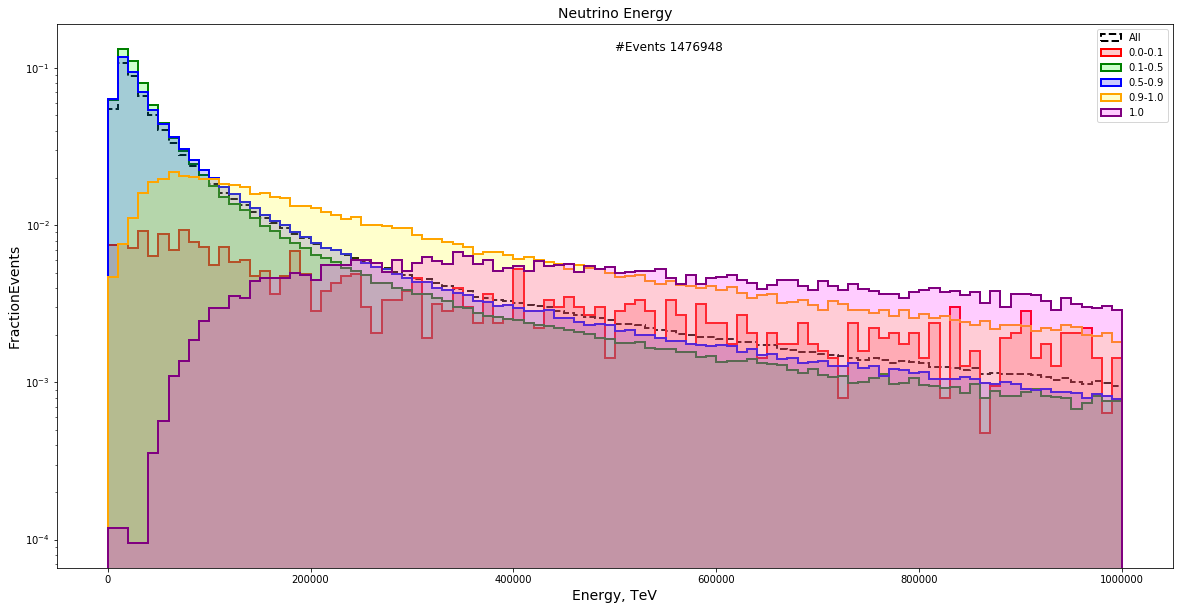

In [23]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Neutrino Energy", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Energy, TeV', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data['neutrino']['energy'], bins =100, weights = weights, histtype = 'step',edgecolor ='k', lw =2, ls = "--", fill=True, fc=(1, 1, 1, 0.2), label = "All",range = [0,10**6])  
ax.hist(data['neutrino']['energy'][mask_00_10], bins =100, weights = weights_00_10, histtype = 'step',edgecolor ='r', lw =2, fill=True, fc=(1, 0, 0, 0.2), label = "0.0-0.1", range = [0,10**6])  
ax.hist(data['neutrino']['energy'][mask_10_50], bins =100, weights = weights_10_50, histtype = 'step',edgecolor ='g', lw =2, fill=True, fc=(0, 1, 0, 0.2), label = "0.1-0.5", range = [0,10**6])  
ax.hist(data['neutrino']['energy'][mask_50_90], bins =100, weights = weights_50_90, histtype = 'step',edgecolor ='b', lw =2, fill=True, fc=(0, 0, 1, 0.2), label = "0.5-0.9", range = [0,10**6])  
ax.hist(data['neutrino']['energy'][mask_90_100], bins =100, weights = weights_90_100, histtype = 'step',edgecolor ='orange', lw =2, fill=True, fc=(1, 1, 0, 0.2), label = "0.9-1.0", range = [0,10**6])  
ax.hist(data['neutrino']['energy'][mask_100], bins =100, weights = weights_100,histtype = 'step',edgecolor ='purple', lw =2, fill=True, fc=(1, 0, 1, 0.2), label = "1.0", range = [0,10**6])  
plt.legend()
plt.show()

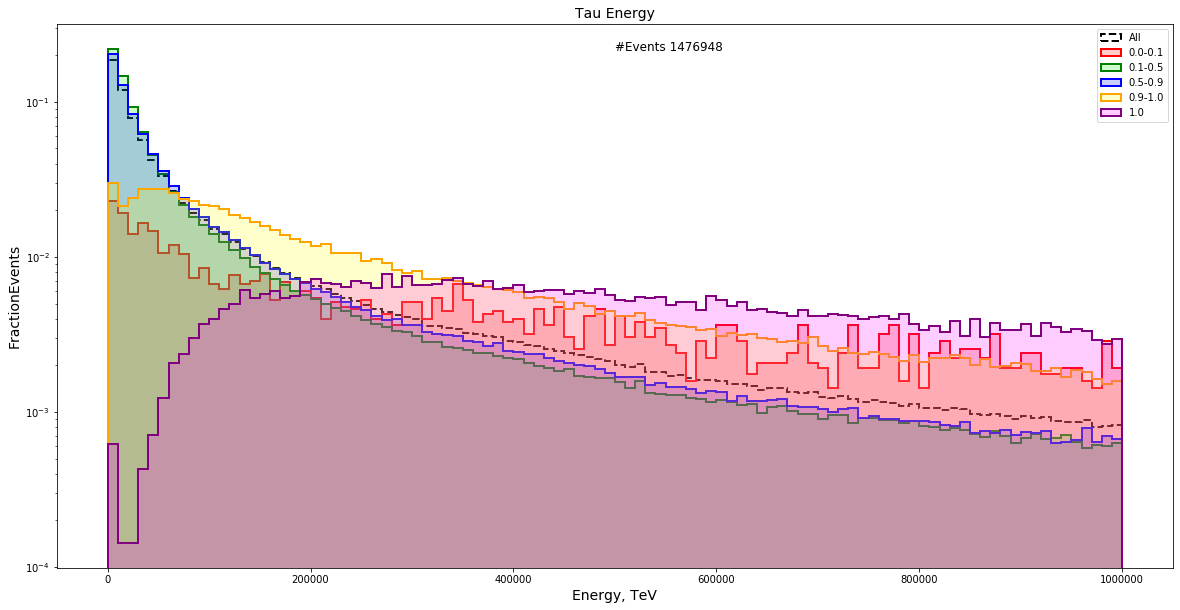

In [24]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Tau Energy", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Energy, TeV', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data['meson']['energy'], bins =100, weights = weights, histtype = 'step',edgecolor ='k', lw =2, ls = "--", fill=True, fc=(1, 1, 1, 0.2), label = "All", range = [0,10**6])  
ax.hist(data['meson']['energy'][mask_00_10], bins =100, weights = weights_00_10, histtype = 'step',edgecolor ='r', lw =2, fill=True, fc=(1, 0, 0, 0.2), label = "0.0-0.1", range = [0,10**6])  
ax.hist(data['meson']['energy'][mask_10_50], bins =100, weights = weights_10_50, histtype = 'step',edgecolor ='g', lw =2, fill=True, fc=(0, 1, 0, 0.2), label = "0.1-0.5", range = [0,10**6])  
ax.hist(data['meson']['energy'][mask_50_90], bins =100, weights = weights_50_90,histtype = 'step',edgecolor ='b', lw =2, fill=True, fc=(0, 0, 1, 0.2), label = "0.5-0.9", range = [0,10**6])  
ax.hist(data['meson']['energy'][mask_90_100], bins =100, weights = weights_90_100, histtype = 'step',edgecolor ='orange', lw =2, fill=True, fc=(1, 1, 0, 0.2), label = "0.9-1.0", range = [0,10**6])  
ax.hist(data['meson']['energy'][mask_100], bins =100, weights = weights_100, histtype = 'step',edgecolor ='purple', lw =2, fill=True, fc=(1, 0, 1, 0.2), label = "1.0", range = [0,10**6])  
plt.legend()
plt.show()

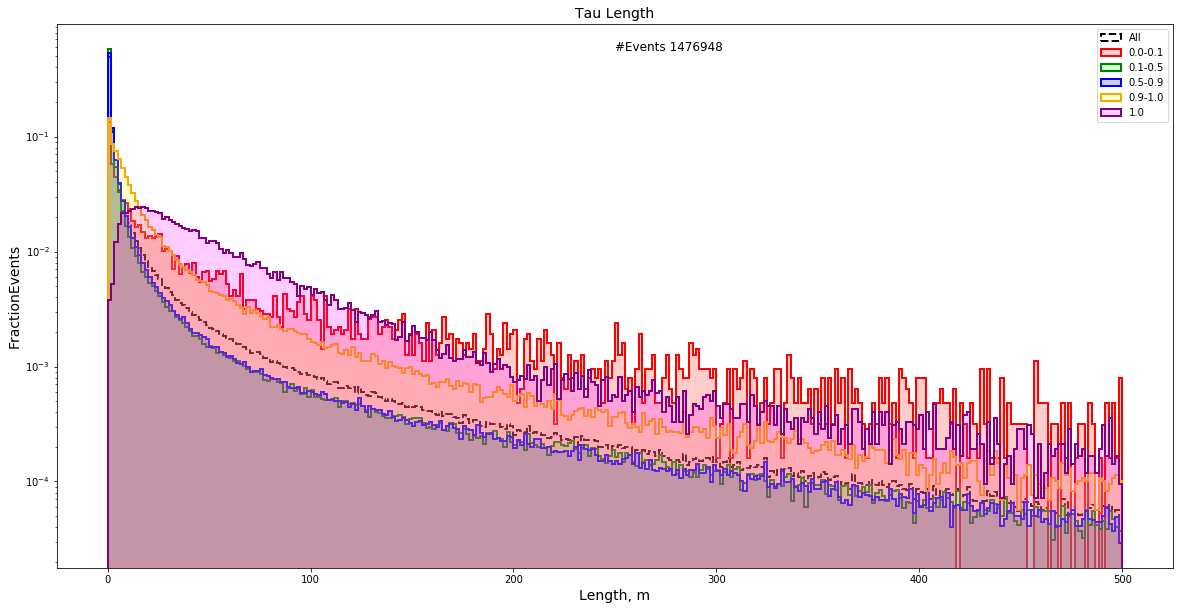

In [25]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Tau Length", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Length, m', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data['meson']['length'], bins =300, weights = weights, histtype = 'step',edgecolor ='k', lw =2, ls = "--", fill=True, fc=(1, 1, 1, 0.2), label = "All", range = [0,0.5*10**3])  
ax.hist(data['meson']['length'][mask_00_10], bins =300, weights = weights_00_10,histtype = 'step',edgecolor ='r', lw =2, fill=True, fc=(1, 0, 0, 0.2), label = "0.0-0.1", range = [0,0.5*10**3])  
ax.hist(data['meson']['length'][mask_10_50], bins =300, weights = weights_10_50,histtype = 'step',edgecolor ='g', lw =2, fill=True, fc=(0, 1, 0, 0.2), label = "0.1-0.5", range = [0,0.5*10**3])  
ax.hist(data['meson']['length'][mask_50_90], bins =300, weights = weights_50_90,histtype = 'step',edgecolor ='b', lw =2, fill=True, fc=(0, 0, 1, 0.2), label = "0.5-0.9", range = [0,0.5*10**3])  
ax.hist(data['meson']['length'][mask_90_100], bins =300, weights = weights_90_100,histtype = 'step',edgecolor ='orange', lw =2, fill=True, fc=(1, 1, 0, 0.2), label = "0.9-1.0", range = [0,0.5*10**3])  
ax.hist(data['meson']['length'][mask_100], bins =300, weights = weights_100,histtype = 'step',edgecolor ='purple', lw =2, fill=True, fc=(1, 0, 1, 0.2), label = "1.0", range = [0,0.5*10**3])  
plt.legend()
plt.show()

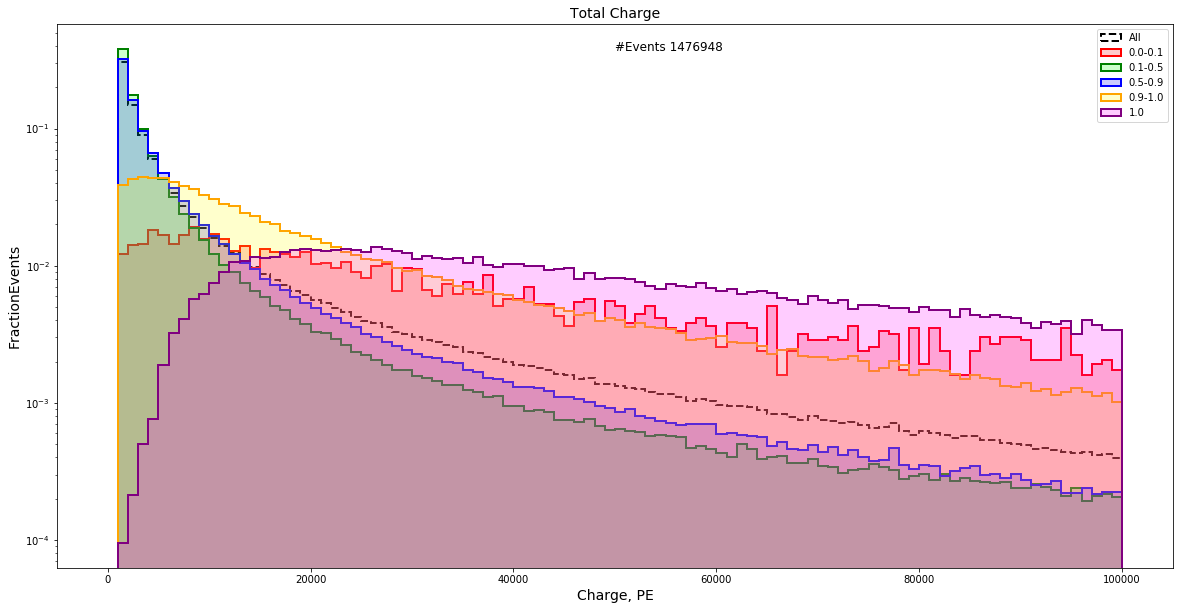

In [26]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Total Charge", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Charge, PE', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)  
ax.hist(data['q_tot'], bins =100, weights = weights, histtype = 'step',edgecolor ='k', lw =2, ls = "--", fill=True, fc=(1, 1, 1, 0.2), label = "All", range = [0,10**5])  
ax.hist(data['q_tot'][mask_00_10], bins =100, weights = weights_00_10,histtype = 'step',edgecolor ='r', lw =2, fill=True, fc=(1, 0, 0, 0.2), label = "0.0-0.1", range = [0,10**5])  
ax.hist(data['q_tot'][mask_10_50], bins =100, weights = weights_10_50,histtype = 'step',edgecolor ='g', lw =2, fill=True, fc=(0, 1, 0, 0.2), label = "0.1-0.5", range = [0,10**5])  
ax.hist(data['q_tot'][mask_50_90], bins =100, weights = weights_50_90,histtype = 'step',edgecolor ='b', lw =2, fill=True, fc=(0, 0, 1, 0.2), label = "0.5-0.9", range = [0,10**5])  
ax.hist(data['q_tot'][mask_90_100], bins =100, weights = weights_90_100,histtype = 'step',edgecolor ='orange', lw =2, fill=True, fc=(1, 1, 0, 0.2), label = "0.9-1.0", range = [0,10**5])  
ax.hist(data['q_tot'][mask_100], bins =100, weights = weights_100,histtype = 'step',edgecolor ='purple', lw =2, fill=True, fc=(1, 0, 1, 0.2), label = "1.0", range = [0,10**5])  
plt.legend()
plt.show()

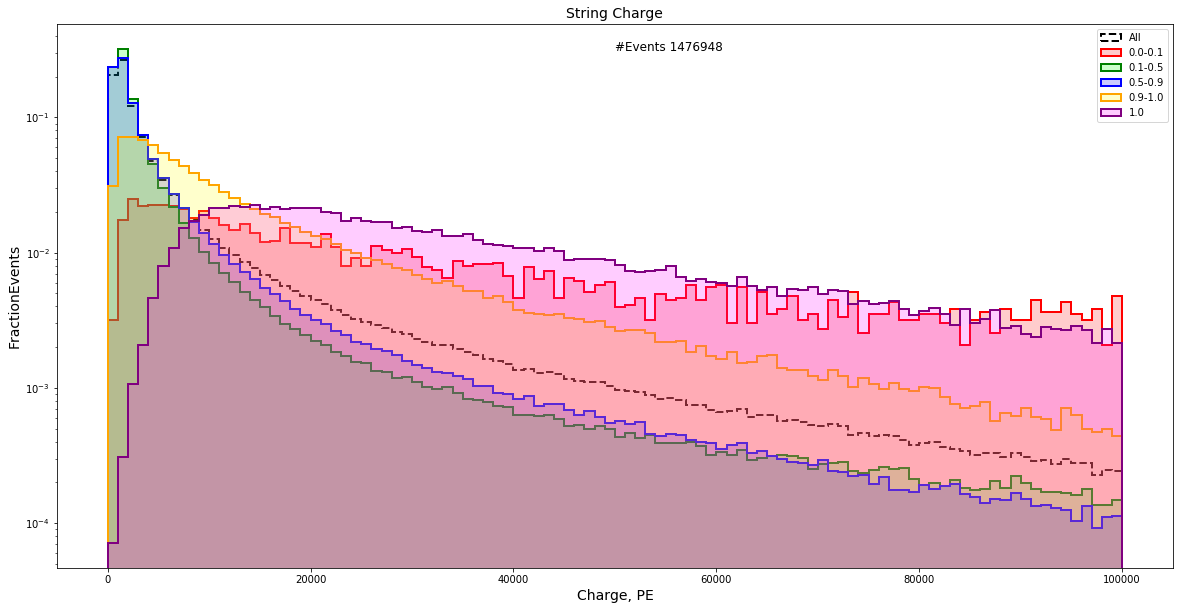

In [29]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("String Charge", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Charge, PE', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)   
ax.hist(data['q_st'], bins =100, weights = weights, histtype = 'step',edgecolor ='k', lw =2, ls = "--", fill=True, fc=(1, 1, 1, 0.2), label = "All", range = [0,10**5])  
ax.hist(data['q_st'][mask_00_10], bins =100,weights = weights_00_10, histtype = 'step',edgecolor ='r', lw =2, fill=True, fc=(1, 0, 0, 0.2), label = "0.0-0.1", range = [0,10**5])  
ax.hist(data['q_st'][mask_10_50], bins =100,weights = weights_10_50, histtype = 'step',edgecolor ='g', lw =2, fill=True, fc=(0, 1, 0, 0.2), label = "0.1-0.5", range = [0,10**5])  
ax.hist(data['q_st'][mask_50_90], bins =100,weights = weights_50_90, histtype = 'step',edgecolor ='b', lw =2, fill=True, fc=(0, 0, 1, 0.2), label = "0.5-0.9", range = [0,10**5])  
ax.hist(data['q_st'][mask_90_100], bins =100,weights = weights_90_100, histtype = 'step',edgecolor ='orange', lw =2, fill=True, fc=(1, 1, 0, 0.2), label = "0.9-1.0", range = [0,10**5])  
ax.hist(data['q_st'][mask_100], bins =100,weights = weights_100, histtype = 'step',edgecolor ='purple', lw =2, fill=True, fc=(1, 0, 1, 0.2), label = "1.0", range = [0,10**5])  
plt.legend()
plt.show()

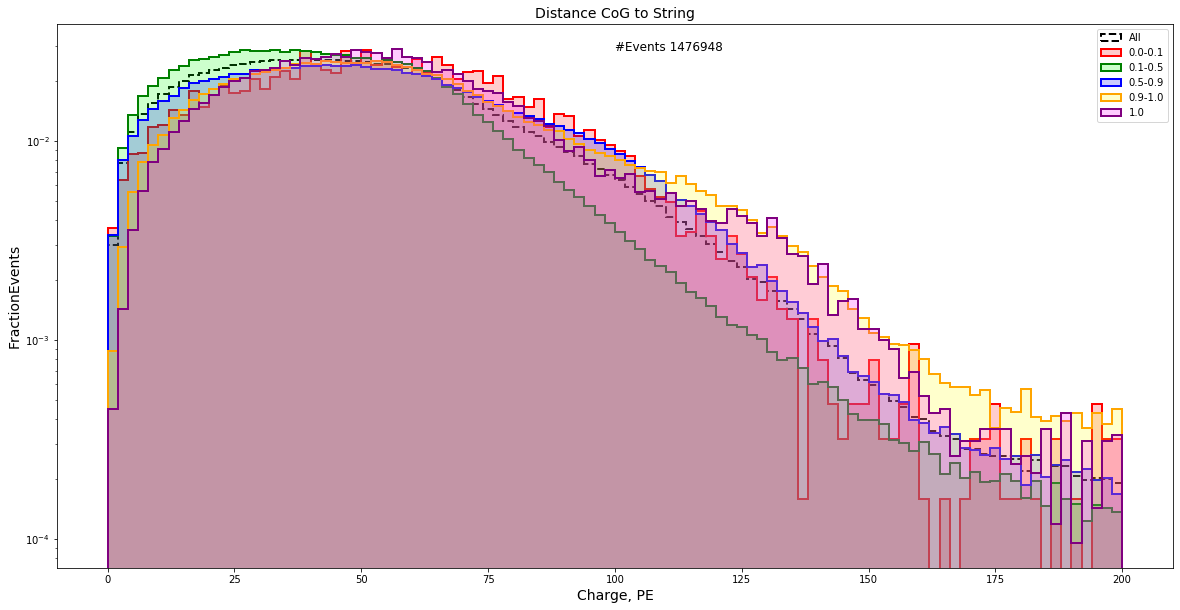

In [30]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Distance CoG to String", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Charge, PE', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)    
ax.hist(data['distance'], bins =100, weights = weights, histtype = 'step',edgecolor ='k', lw =2, ls = "--", fill=True, fc=(1, 1, 1, 0.2), label = "All", range = [0,200])  
ax.hist(data['distance'][mask_00_10], bins =100,weights = weights_00_10, histtype = 'step', edgecolor ='r', lw =2, fill=True, fc=(1, 0, 0, 0.2), label = "0.0-0.1", range = [0,200])  
ax.hist(data['distance'][mask_10_50], bins =100,weights = weights_10_50, histtype = 'step',edgecolor ='g', lw =2, fill=True, fc=(0, 1, 0, 0.2), label = "0.1-0.5", range = [0,200])  
ax.hist(data['distance'][mask_50_90], bins =100,weights = weights_50_90, histtype = 'step',edgecolor ='b', lw =2, fill=True, fc=(0, 0, 1, 0.2), label = "0.5-0.9", range = [0,200])  
ax.hist(data['distance'][mask_90_100], bins =100,weights = weights_90_100, histtype = 'step',edgecolor ='orange', lw =2, fill=True, fc=(1, 1, 0, 0.2), label = "0.9-1.0", range = [0,200])  
ax.hist(data['distance'][mask_100], bins =100,weights = weights_100, histtype = 'step',edgecolor ='purple', lw =2, fill=True, fc=(1, 0, 1, 0.2), label = "1.0", range = [0,200])  
plt.legend()
plt.show()

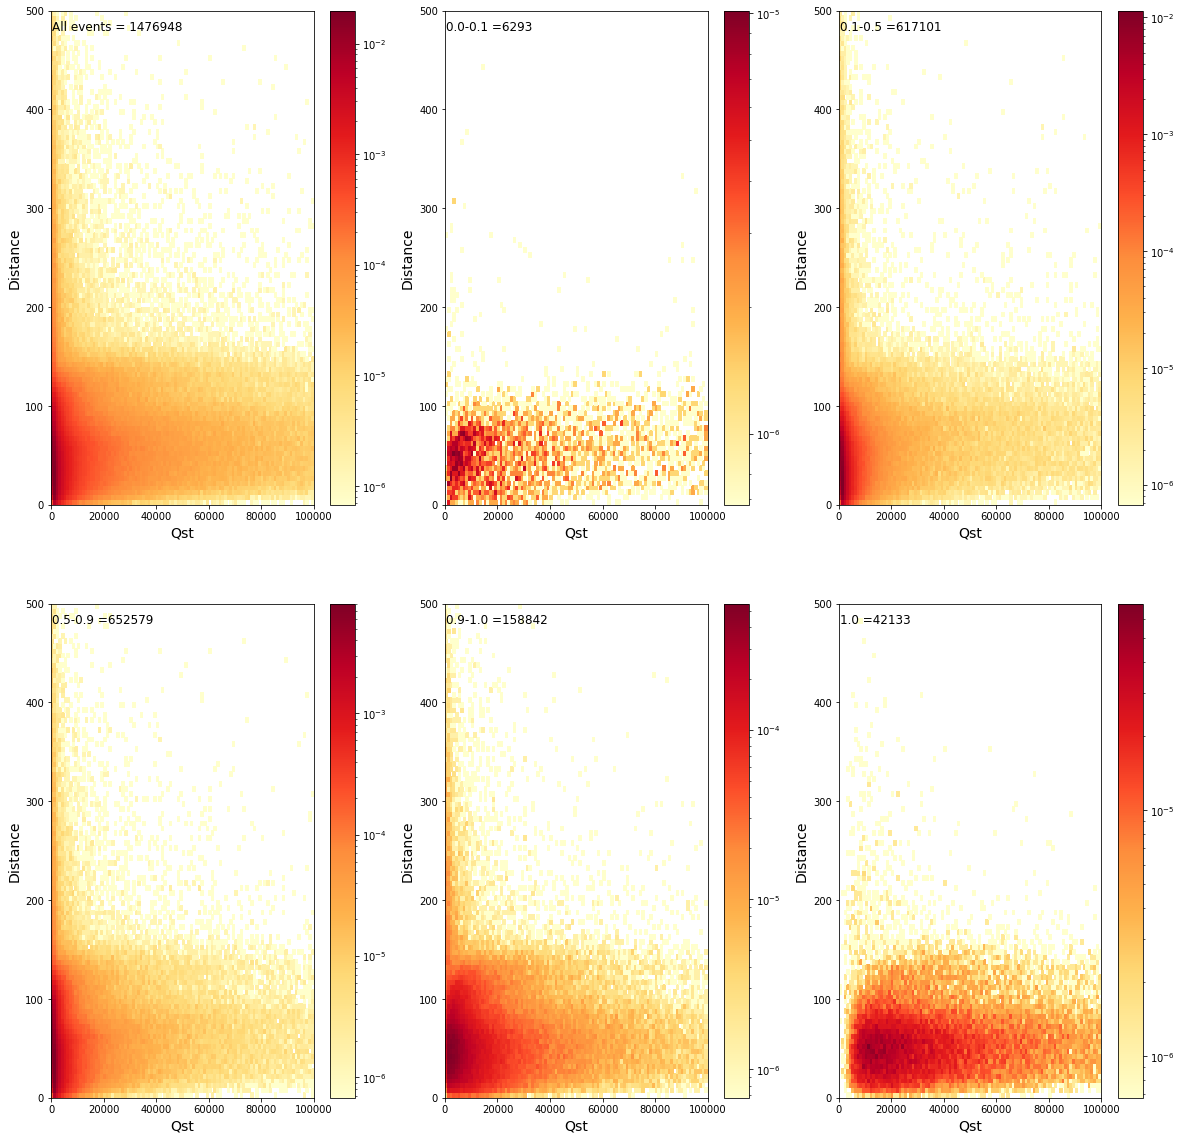

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=3,sharex = True,sharey=True, figsize=(20,20))
plt.title('Qst/Distance dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(2,3,1)
plt.hist2d(data['q_st'].flatten(),data['distance'].flatten(), weights = weights, bins = 100, range = [[0,10**5],[0,500]],norm=mpl.colors.LogNorm() ,cmap = 'YlOrRd')
plt.text(500,480,'All events = '+str(len(data)), color = "k",fontsize=12)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,3,2)
plt.hist2d(data['q_st'][mask_00_10].flatten(),data['distance'][mask_00_10].flatten(), weights = weights[mask_00_10],bins = 100, range = [[0,10**5],[0,500]], norm=mpl.colors.LogNorm() ,cmap = 'YlOrRd')#,vmax = 0.001)
plt.text(500,480,'0.0-0.1 ='+str(data[mask_00_10].shape[0]), color = "k",fontsize=12)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,3,3)
plt.hist2d(data['q_st'][mask_10_50].flatten(),data['distance'][mask_10_50].flatten(), weights = weights[mask_10_50],bins = 100, range = [[0,10**5],[0,500]], norm=mpl.colors.LogNorm() ,cmap = 'YlOrRd')#,vmax = 0.001)
plt.text(500,480,'0.1-0.5 ='+str(data[mask_10_50].shape[0]), color = "k",fontsize=12)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,3,4)
plt.hist2d(data['q_st'][mask_50_90].flatten(),data['distance'][mask_50_90].flatten(), weights = weights[mask_50_90],bins = 100, range = [[0,10**5],[0,500]], norm=mpl.colors.LogNorm() ,cmap = 'YlOrRd')#,vmax = 0.001)
plt.text(500,480,'0.5-0.9 ='+str(data[mask_50_90].shape[0]), color = "k",fontsize=12)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,3,5)
plt.hist2d(data['q_st'][mask_90_100].flatten(),data['distance'][mask_90_100].flatten(), weights = weights[mask_90_100],bins = 100, range = [[0,10**5],[0,500]], norm=mpl.colors.LogNorm() ,cmap = 'YlOrRd')#,vmax = 0.001)
plt.text(500,480,'0.9-1.0 ='+str(data[mask_90_100].shape[0]), color = "k",fontsize=12)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,3,6)
plt.hist2d(data['q_st'][mask_100].flatten(),data['distance'][mask_100].flatten(), weights = weights[mask_100],bins = 100, range = [[0,10**5],[0,500]], norm=mpl.colors.LogNorm() ,cmap = 'YlOrRd')#,vmax = 0.001)
plt.text(500,480,'1.0 ='+str(data[mask_100].shape[0]), color = "k",fontsize=12)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()


plt.show()

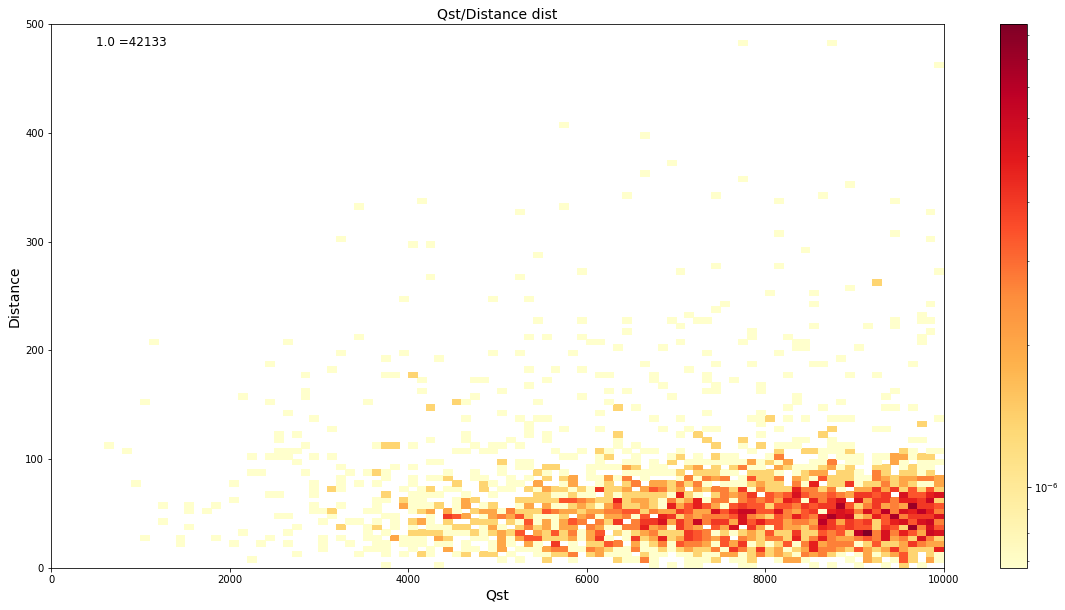

In [69]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Qst/Distance dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.hist2d(data['q_st'][mask_100].flatten(),data['distance'][mask_100].flatten(), weights = weights[mask_100],bins = 100, range = [[0,10**4],[0,500]], norm=mpl.colors.LogNorm() ,cmap = 'YlOrRd')#,vmax = 0.001)
plt.text(500,480,'1.0 ='+str(data[mask_100].shape[0]), color = "k",fontsize=12)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()
plt.show()

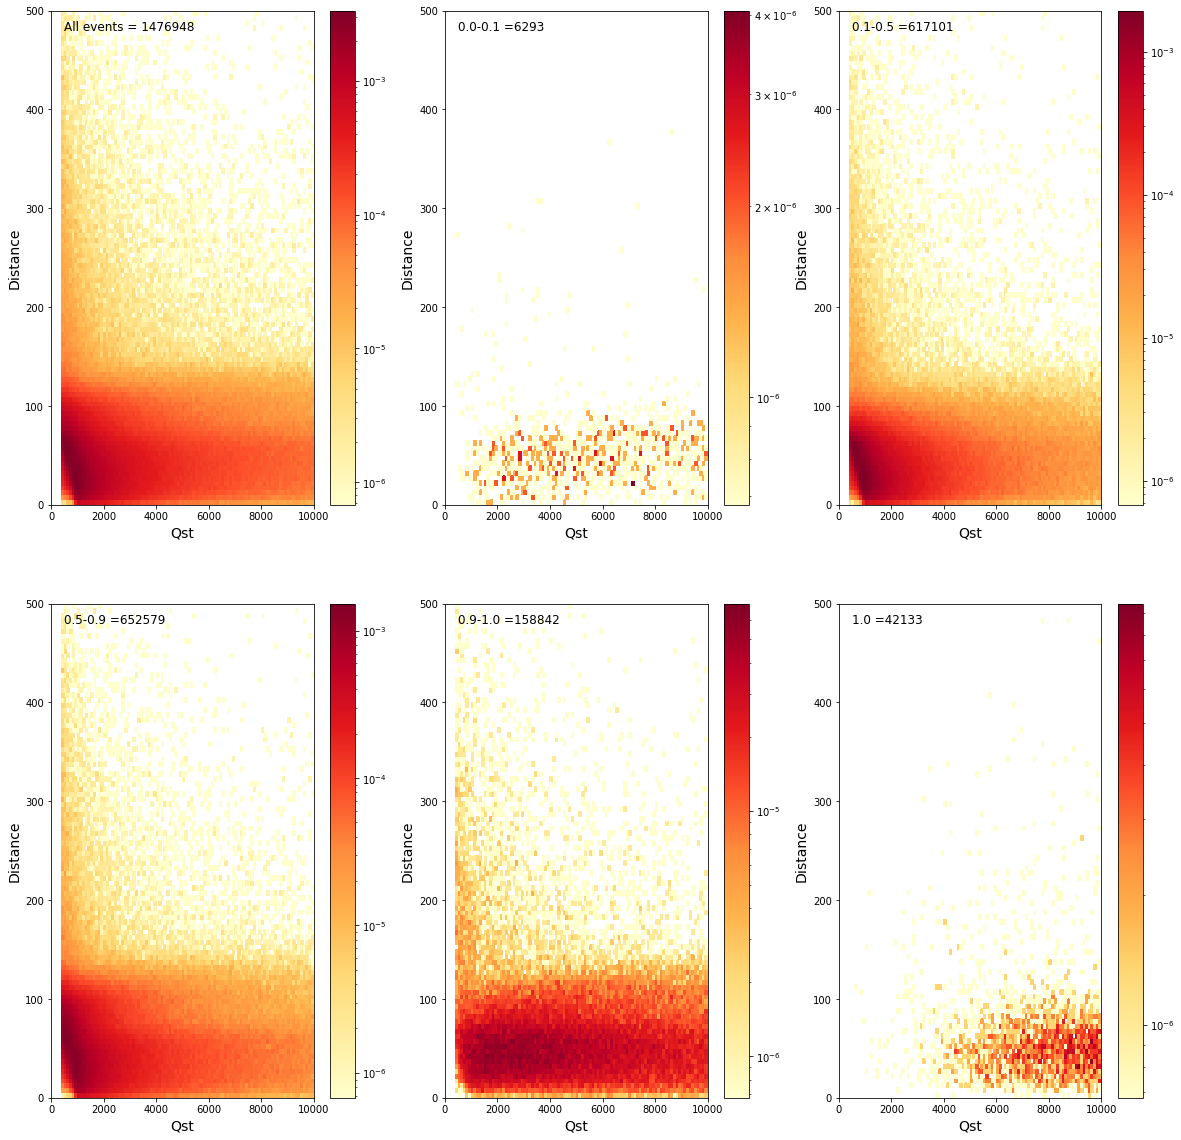

In [70]:
fig, ax = plt.subplots(nrows=2, ncols=3,sharex = True,sharey=True, figsize=(20,20))
plt.title('Qst/Distance dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(2,3,1)
plt.hist2d(data['q_st'].flatten(),data['distance'].flatten(), weights = weights, bins = 100, range = [[0,10**4],[0,500]],norm=mpl.colors.LogNorm() ,cmap = 'YlOrRd')
plt.text(500,480,'All events = '+str(len(data)), color = "k",fontsize=12)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,3,2)
plt.hist2d(data['q_st'][mask_00_10].flatten(),data['distance'][mask_00_10].flatten(), weights = weights[mask_00_10],bins = 100, range = [[0,10**4],[0,500]], norm=mpl.colors.LogNorm() ,cmap = 'YlOrRd')#,vmax = 0.001)
plt.text(500,480,'0.0-0.1 ='+str(data[mask_00_10].shape[0]), color = "k",fontsize=12)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,3,3)
plt.hist2d(data['q_st'][mask_10_50].flatten(),data['distance'][mask_10_50].flatten(), weights = weights[mask_10_50],bins = 100, range = [[0,10**4],[0,500]], norm=mpl.colors.LogNorm() ,cmap = 'YlOrRd')#,vmax = 0.001)
plt.text(500,480,'0.1-0.5 ='+str(data[mask_10_50].shape[0]), color = "k",fontsize=12)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,3,4)
plt.hist2d(data['q_st'][mask_50_90].flatten(),data['distance'][mask_50_90].flatten(), weights = weights[mask_50_90],bins = 100, range = [[0,10**4],[0,500]], norm=mpl.colors.LogNorm() ,cmap = 'YlOrRd')#,vmax = 0.001)
plt.text(500,480,'0.5-0.9 ='+str(data[mask_50_90].shape[0]), color = "k",fontsize=12)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,3,5)
plt.hist2d(data['q_st'][mask_90_100].flatten(),data['distance'][mask_90_100].flatten(), weights = weights[mask_90_100],bins = 100, range = [[0,10**4],[0,500]], norm=mpl.colors.LogNorm() ,cmap = 'YlOrRd')#,vmax = 0.001)
plt.text(500,480,'0.9-1.0 ='+str(data[mask_90_100].shape[0]), color = "k",fontsize=12)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(2,3,6)
plt.hist2d(data['q_st'][mask_100].flatten(),data['distance'][mask_100].flatten(), weights = weights[mask_100],bins = 100, range = [[0,10**4],[0,500]], norm=mpl.colors.LogNorm() ,cmap = 'YlOrRd')#,vmax = 0.001)
plt.text(500,480,'1.0 ='+str(data[mask_100].shape[0]), color = "k",fontsize=12)
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Distance",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()


plt.show()

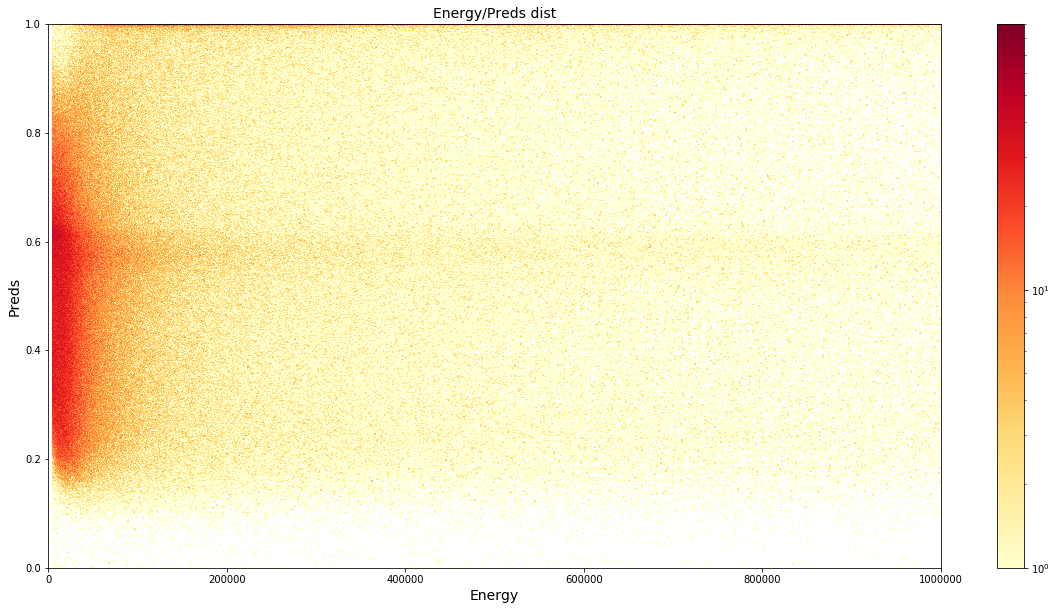

In [95]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Energy/Preds dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.hist2d(data['neutrino']['energy'].flatten(),preds[:,1], bins = 1000, range = [[0,10**6],[0,1]],norm=mpl.colors.LogNorm() ,cmap = 'YlOrRd')
plt.xlabel("Energy",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Preds",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()
plt.show()

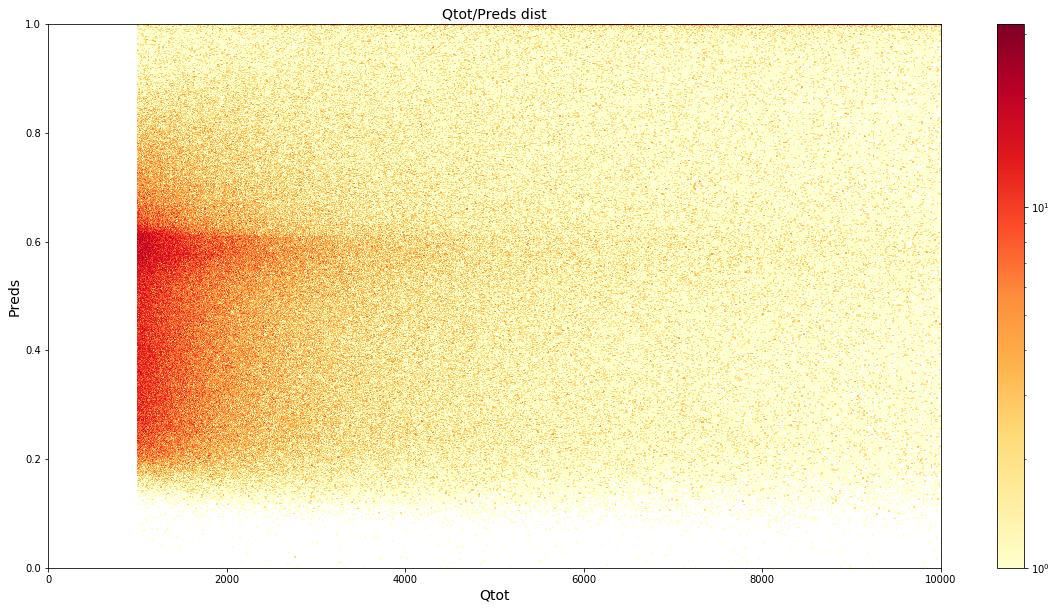

In [94]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Qtot/Preds dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.hist2d(data['q_tot'].flatten(),preds[:,1], bins = 1000, range = [[0,10**4],[0,1]],norm=mpl.colors.LogNorm() ,cmap = 'YlOrRd')
plt.xlabel("Qtot",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Preds",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()
plt.show()

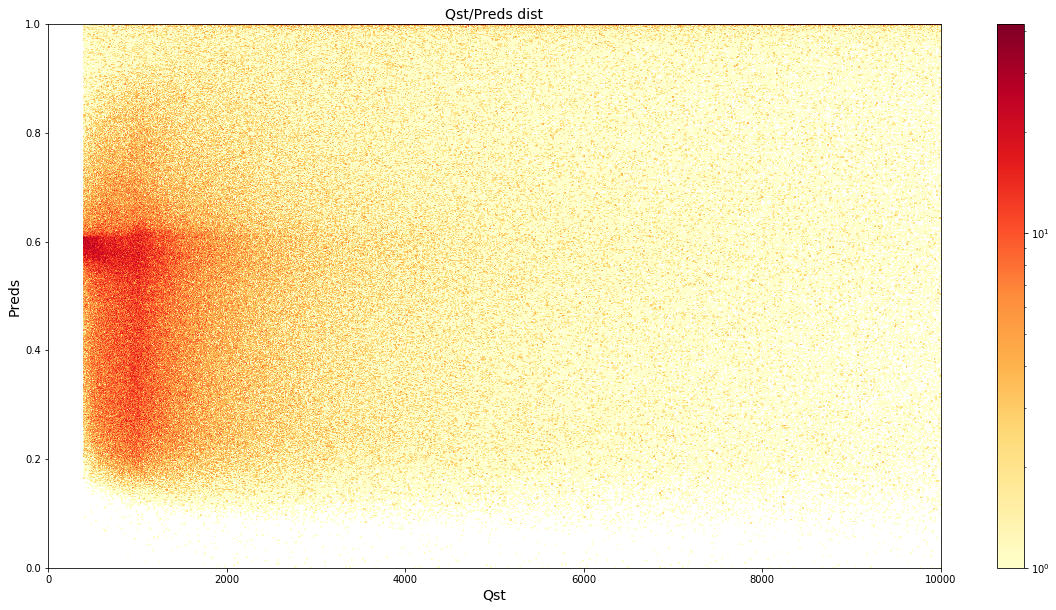

In [93]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Qst/Preds dist', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.hist2d(data['q_st'].flatten(),preds[:,1], bins = 1000, range = [[0,10**4],[0,1]],norm=mpl.colors.LogNorm() ,cmap = 'YlOrRd')
plt.xlabel("Qst",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Preds",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()
plt.show()